# Assignment Week 2 
Answer each question completely. Include your code and summarize what you see in a brief narrative.

### Charting:
Remember to make your charts as self-sufficient as possible (i.e., labels, titles, lack of clutter)  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('car_prices.csv', low_memory=False)

In [2]:
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,4.5,18255.0,silver,black,avis corporation,35300,33000,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5,54393.0,white,black,i -5 uhlmann rv,30200,30800,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,4.8,50561.0,black,black,financial services remarketing (lease),29800,34000,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,3.8,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100,11100,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


# Data Description:
- year: year the car was built (e.g., the model year)  
- make: the manufacturer. 
- model: specific model of the car  
- trim: subtype of the car model. 
- body: body style of the car. 
- transmission: type of transmission  
- vin: unique identifier of the car. 
- state: state car is registered. 
- condition: numerical rating of the condition, higher is better.  
- odometer: number of miles the car has been driven.   
- color: color of the car.  
- interior: type of interior (e.g., seats). 
- seller: who sold the car.  
- mmr: estimated wholesale price of the car.  
- sellingprice: actual sales price of the car.  
- saledate: date and time of the sale. 

# Question 1. Determine the number of missing values in each column.

In [3]:
data = []
for col in df.columns:
    data.append({'Column' : col,'Unique' : len(df[col].unique()),
                'Null Count' : df[col].isnull().sum(),
                'Null Percentage' : round(df[col].isnull().sum()/df.shape[0]*100,2) })
pd.DataFrame(data).sort_values(['Null Percentage'],ascending=False)

,Column,Unique,Null Count,Null Percentage
5,transmission,5,65353,11.69
4,body,88,13195,2.36
8,condition,54,11794,2.11
3,trim,1974,10651,1.91
2,model,974,10399,1.86
1,make,97,10301,1.84
10,color,47,749,0.13
11,interior,18,749,0.13
9,odometer,172287,94,0.02
0,year,34,0,0.00


Transmisson has 11.69% of null values and all other colums are less than 3%

# Question 2. Check the data types. Which columns are coded to the incorrect type? If any, correct them.

In [4]:

# code
print(df.dtypes)

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition        object
odometer        float64
color            object
interior         object
seller           object
mmr              object
sellingprice      int64
saledate         object
dtype: object


In [5]:
# Values in condition have some incorrect values so removing those rows
df.drop(df[df.condition.str.contains(r'[a-zA-Z]', na=False)].index, inplace=True)

In [6]:
df['condition'] = df['condition'].astype(float)
df['mmr'] = df['mmr'].astype(int)
df['saledate'] = pd.to_datetime(df['saledate'], utc=True)

In [7]:
print(df.dtypes)

year                          int64
make                         object
model                        object
trim                         object
body                         object
transmission                 object
vin                          object
state                        object
condition                   float64
odometer                    float64
color                        object
interior                     object
seller                       object
mmr                           int32
sellingprice                  int64
saledate        datetime64[ns, UTC]
dtype: object


condition and mmr is converted to float and integer type and Saledate is converted into Datetime format.

# Question 3. Analyze the 'make' column. Comment on what you observe. Clean the column to reduce the number of unique values to as few as reasonably possible (no hard coding). 
Hint: What do you notice if you run this:
```python
makes = df.make.unique().tolist()
makes = [str(x).lower() for x in makes]
sorted(makes)
```

In [8]:
#code
import numpy as np
makes = df.make.unique().tolist()
makes = [str(x).lower() for x in makes]
sorted(makes)
makeslist = np.unique(makes)
makeslist

array(['acura', 'airstream', 'aston martin', 'audi', 'bentley', 'bmw',
       'buick', 'cadillac', 'chev truck', 'chevrolet', 'chrysler',
       'daewoo', 'dodge', 'dodge tk', 'dot', 'ferrari', 'fiat', 'fisker',
       'ford', 'ford tk', 'ford truck', 'geo', 'gmc', 'gmc truck',
       'honda', 'hummer', 'hyundai', 'hyundai tk', 'infiniti', 'isuzu',
       'jaguar', 'jeep', 'kia', 'lamborghini', 'land rover', 'landrover',
       'lexus', 'lincoln', 'lotus', 'maserati', 'mazda', 'mazda tk',
       'mercedes', 'mercedes-b', 'mercedes-benz', 'mercury', 'mini',
       'mitsubishi', 'nan', 'nissan', 'oldsmobile', 'plymouth', 'pontiac',
       'porsche', 'ram', 'rolls-royce', 'saab', 'saturn', 'scion',
       'smart', 'subaru', 'suzuki', 'tesla', 'toyota', 'volkswagen',
       'volvo', 'vw'], dtype='<U13')

in the unique values we can observe that ford and chevrolet is repeated with suffix tk and truck. Land rover have a space 

In [9]:
df['make'] = df['make'].str.lower()
df['make'] = df['make'].replace([' tk',' truck'], '',regex=True)   

In [10]:
df.make.unique()

array(['kia', 'bmw', 'volvo', 'nissan', 'chevrolet', 'audi', 'ford',
       'hyundai', 'buick', 'cadillac', 'acura', 'lexus', 'infiniti',
       'jeep', 'mercedes-benz', 'mitsubishi', 'mazda', 'mini',
       'land rover', 'lincoln', 'jaguar', 'volkswagen', 'toyota',
       'subaru', 'scion', 'porsche', nan, 'dodge', 'fiat', 'chrysler',
       'ferrari', 'honda', 'gmc', 'ram', 'smart', 'bentley', 'pontiac',
       'saturn', 'maserati', 'mercury', 'hummer', 'landrover', 'mercedes',
       'saab', 'suzuki', 'oldsmobile', 'isuzu', 'geo', 'rolls-royce',
       'mercedes-b', 'vw', 'daewoo', 'chev', 'plymouth', 'tesla',
       'airstream', 'dot', 'aston martin', 'fisker', 'lamborghini',
       'lotus'], dtype=object)

Replaced tk and truck with null space

# Question 4. Analyze the relationship between the wholeprice 'mmr' and the sales price. What is the overall correlation? What happens to the correlation as you increase the maximum selling price window (e.g., 0-10000, 0-20000,...)?
- Create a scatter plot with the relationship.  
- Create a graph that shows how the correlation changes.

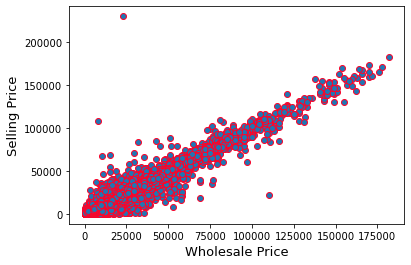

In [11]:
# code

fig, ax = plt.subplots()
ax.scatter(x = df['mmr'], y = df['sellingprice'],edgecolors='#fc052a')
plt.ylabel('Selling Price', fontsize=13)
plt.xlabel('Wholesale Price', fontsize=13)
plt.show()

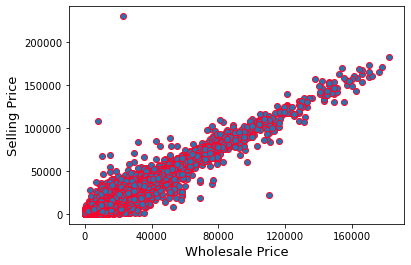

In [12]:
fig, ax = plt.subplots()
ax.scatter(x = df['mmr'], y = df['sellingprice'],edgecolors='#fc052a')
ax.xaxis.set_ticks(np.arange(0, 200000, 40000))
plt.ylabel('Selling Price', fontsize=13)
plt.xlabel('Wholesale Price', fontsize=13)
plt.show()



No corelation change after increasing the window of x axis 

It has Positive corelation

# Question 5. How does the distribution of sales price vary by make for cars made between 2010-2015? Use the 10 most common makes (your cleaned version of this column). Create a graph that answers this question.

In [13]:
# code
df_new = df[['make','sellingprice', 'saledate']]

In [14]:
df_list = df_new['make'].value_counts()[:10].index

In [15]:
# Top 10 car models
df_list

Index(['ford', 'chevrolet', 'nissan', 'toyota', 'dodge', 'honda', 'hyundai',
       'bmw', 'kia', 'chrysler'],
      dtype='object')

In [16]:
df_new['year'] = df['saledate'].dt.year

In [17]:
df_new

,make,sellingprice,saledate,year
0,kia,21500,2014-12-16 04:30:00+00:00,2014
1,kia,21500,2014-12-16 04:30:00+00:00,2014
2,bmw,30000,2015-01-14 20:30:00+00:00,2015
3,volvo,27750,2015-01-28 20:30:00+00:00,2015
4,bmw,67000,2014-12-18 04:30:00+00:00,2014
...,...,...,...,...
558832,kia,33000,2015-07-09 00:00:00+00:00,2015
558833,ram,30800,2015-07-08 02:30:00+00:00,2015
558834,bmw,34000,2015-07-08 02:30:00+00:00,2015
558835,nissan,11100,2015-07-08 23:45:00+00:00,2015


In [31]:
df_new =df_new.query("year >= 2010 and year <=2015")
df_filtered = df_new[df_new['make'].isin(df_list)]
df_filtered.drop("saledate",axis=1,inplace=True)

In [32]:
df_filtered

,make,sellingprice,year
0,kia,21500,2014
1,kia,21500,2014
2,bmw,30000,2015
4,bmw,67000,2014
5,nissan,10900,2014
...,...,...,...
558831,bmw,22800,2015
558832,kia,33000,2015
558834,bmw,34000,2015
558835,nissan,11100,2015


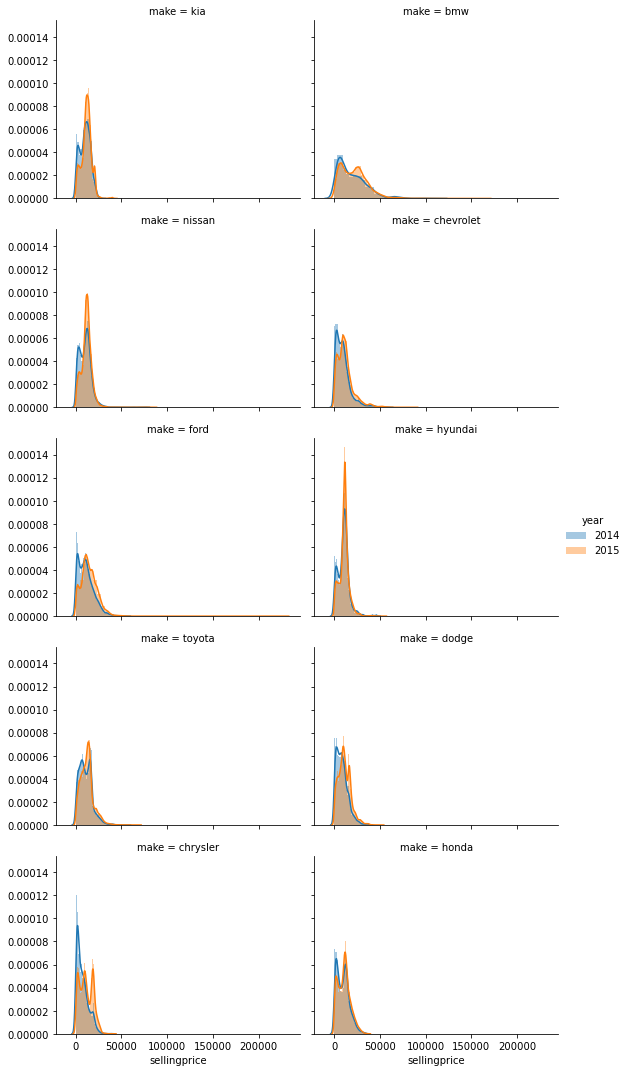

In [37]:
g = sns.FacetGrid(df_filtered, col='make', hue='year',height=3,aspect= 1.33, col_wrap=2)
p1 = g.map(sns.distplot, 'sellingprice').add_legend()

Reference : https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
For KIA nissan and Hyndai selling price was more in 2015 compared to 2014.
honda dodge and chrysler the selling price was same in 2014 and 2015